In [3]:
import pandas as pd
import numpy as np

In [4]:
# Load in Raw Data
df = pd.read_csv('Data/tmdb_results_combined.csv.gz')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2655 non-null   int64  
 1   imdb_id                2655 non-null   object 
 2   adult                  2653 non-null   float64
 3   backdrop_path          1525 non-null   object 
 4   belongs_to_collection  217 non-null    object 
 5   budget                 2653 non-null   float64
 6   genres                 2653 non-null   object 
 7   homepage               213 non-null    object 
 8   id                     2653 non-null   float64
 9   original_language      2653 non-null   object 
 10  original_title         2653 non-null   object 
 11  overview               2593 non-null   object 
 12  popularity             2653 non-null   float64
 13  poster_path            2411 non-null   object 
 14  production_companies   2653 non-null   object 
 15  prod

,Unnamed: 0,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.300,1238.0,PG-13
2,2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13


In [5]:
df = df.drop(columns = "Unnamed: 0")

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

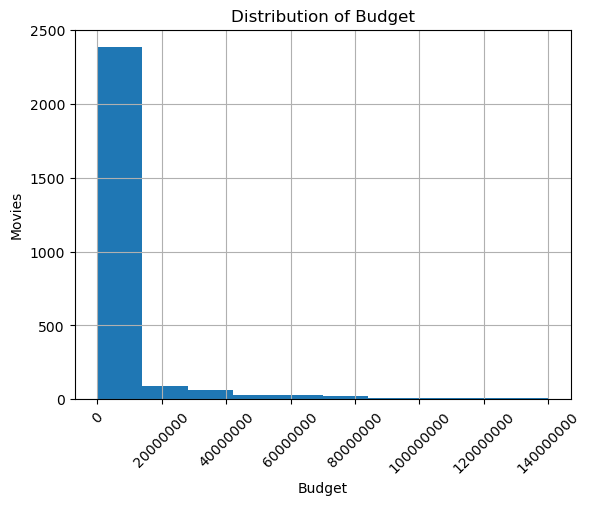

In [7]:
ax = df['budget'].hist()
ax.ticklabel_format(style='plain')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Budget')
ax.set_xlabel('Budget')
ax.set_ylabel('Movies');

In [32]:
budget_above_0 = df['budget'] > 0
budget_above_0.sum()

409

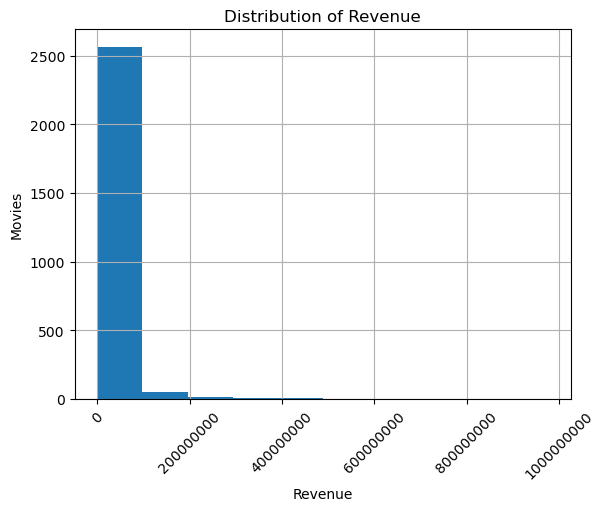

In [8]:
ax = df['revenue'].hist()
ax.ticklabel_format(style='plain')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Revenue')
ax.set_xlabel('Revenue')
ax.set_ylabel('Movies');

In [31]:
revenue_above_0 = df['revenue'] > 0
revenue_above_0.sum()

409

# Per assignment instructions, please exclude any movies with 0's for budget AND revenue.
# We will filter movies with either 0 budget or revenue, convert the 0 to a null value, and then drop the nulls from each column

In [9]:
df['budget'].isna().sum()

2

In [10]:
df['budget'].describe()

count    2.653000e+03
mean     5.250962e+06
std      1.704009e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.400000e+08
Name: budget, dtype: float64

In [11]:
filter_zero_budget = df['budget'] == 0.00
filter_zero_budget.sum()

2037

In [12]:
df.loc[filter_zero_budget,'budget'] = np.nan
df['budget'].describe()
df['budget'].isna().sum()

2039

In [13]:
df['revenue'].isna().sum()

2

In [14]:
df['revenue'].describe()

count    2.653000e+03
mean     1.214717e+07
std      6.002296e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.764756e+08
Name: revenue, dtype: float64

In [15]:
filter_zero_revenue = df['revenue'] == 0.00
filter_zero_revenue.sum()

2134

In [16]:
df.loc[filter_zero_revenue,'revenue'] = np.nan
df['revenue'].describe()
df['revenue'].isna().sum()

2136

In [17]:
df = df.dropna(subset=["budget","revenue"])

In [18]:
df['budget'].isna().sum()

0

In [19]:
df['revenue'].isna().sum()

0

# How many movies are there in each of the certification categories (G/PG/PG-13/R)?

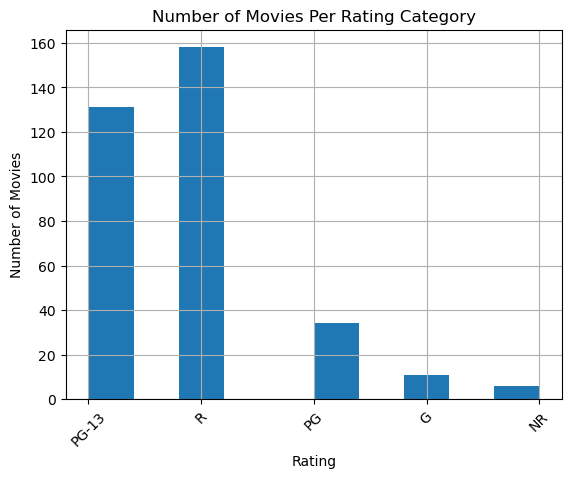

In [20]:
ax = df['certification'].hist()
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Number of Movies Per Rating Category')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies');

In [24]:
df.certification.value_counts()

R        158
PG-13    131
PG        34
G         11
NR         6
Name: certification, dtype: int64

# What is the average revenue per certification category?

In [22]:
df.groupby('certification')['revenue'].mean()

certification
G        1.401132e+08
NR       1.041057e+07
PG       1.901400e+08
PG-13    1.102883e+08
R        4.649087e+07
Name: revenue, dtype: float64

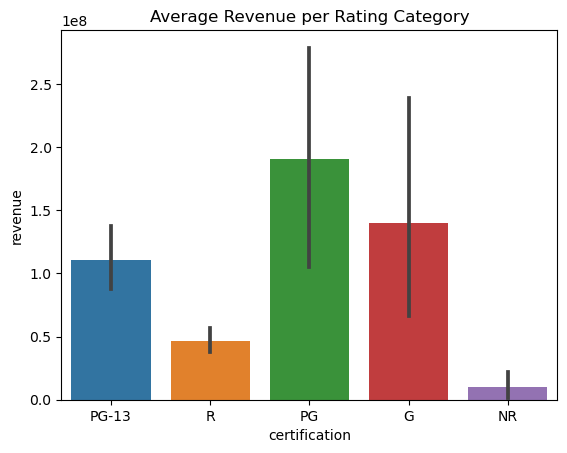

In [53]:
ax = sns.barplot(data=df, x='certification', y="revenue")
ax.set_title('Average Revenue per Rating Category');

# What is the average budget per certification category?

In [23]:
df.groupby('certification')['budget'].mean()

certification
G        4.781818e+07
NR       4.633333e+06
PG       5.064404e+07
PG-13    4.368342e+07
R        2.755095e+07
Name: budget, dtype: float64

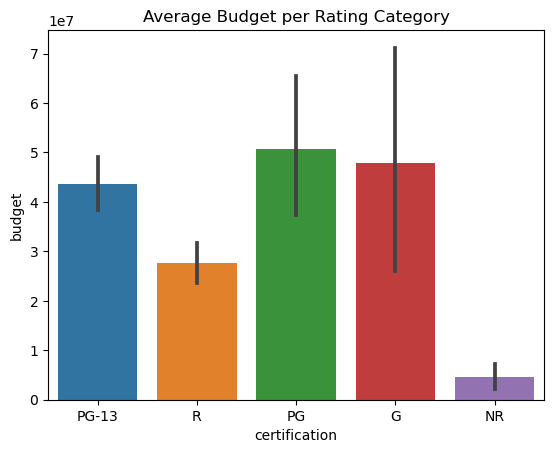

In [54]:
ax = sns.barplot(data=df, x='certification', y="budget")
ax.set_title('Average Budget per Rating Category');